# Análise exploratória de óbitos no Brasil

Inicialmente, conduzi uma etapa preliminar de limpeza e exploração dos dados (descrita no caderno "Limpeza e rascunho", na pasta "rascunho"). Observei que as tabelas estão livres de valores nulos, ou N/A. Não identifiquei dados incongruentes, ou mal coletados. Entretanto, é importante observar que 326 cidades apresentaram apenas um óbito num período de um ano. É necessário uma análise mais detalhada para entender se este valor é um ruído nos dados (causado por problema na coleta dos dados, por exemplo), ou se realmente reflete a realidade de algumas cidades no país. 

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas_gbq

In [2]:
m = pandas.read_csv('municipio.csv')
m_causa = pandas.read_csv('municipio_causa.csv')

## Análise da quantidade de óbitos

Os dados fornecidos na tabela "municipio.csv" contém registros de óbitos em cidades brasileiras, no período de 1996 a 2018. O desvio padrão (std) nos mostra que existe diversidade na quantidade de mortes reportadas por cada cidade anualmente. Dessa forma, a quantidade de mortes não é um valor padrão, e varia bastante entre as cidades. O número máximo de mortes anuais registrado por uma cidade foi de 77 474. 75% dos registros reportou 127 mortes por ano, ou menos. Isso indica que poucas cidades reportaram um alto número de óbitos neste período. Em seguida irei separar esses dados por data e por região para entender melhor como os óbitos estão distribuídos.


In [3]:
m.describe()

,Unnamed: 0,id_municipio,ano,numero_obitos
count,127298.000000,1.272980e+05,127298.000000,127298.000000
mean,63648.500000,3.252854e+06,2007.065429,195.976260
std,36747.911621,9.831020e+05,6.600660,1302.752436
min,0.000000,1.100000e+06,1996.000000,1.000000
25%,31824.250000,2.512721e+06,2001.000000,27.000000
50%,63648.500000,3.146305e+06,2007.000000,56.000000
75%,95472.750000,4.118501e+06,2013.000000,127.000000
max,127297.000000,5.306006e+06,2018.000000,77474.000000


In [4]:
ne = m[m['estado_abrev'].isin(['AL','BA', 'CE', 'MA','PB','PE','PI','RN','SE'])]
co = m[m['estado_abrev'].isin(['GO','MT', 'MS', 'DF'])]
no = m[m['estado_abrev'].isin(['AC','AP', 'AM', 'PA','RO','RR','TO'])]
se = m[m['estado_abrev'].isin(['ES','MG', 'RJ', 'SP'])]
sul = m[m['estado_abrev'].isin(['PR','RS', 'SC'])]

No gráfico abaixo é possível observar uma disparidade na quantidade de mortes por região. A região Sudeste (SE) apresentou aproximadamente 12 milhões de mortes no período de 1996 a 2018. Quase o dobro do total de óbitos ocorridos no Nordeste (NE). Uma diferença semelhante é observada ao comparar o total de mortes do NE e da região Sul (S). Centro-oeste (CO) e Norte (NO) apresentam um total de óbitos semelhantes.

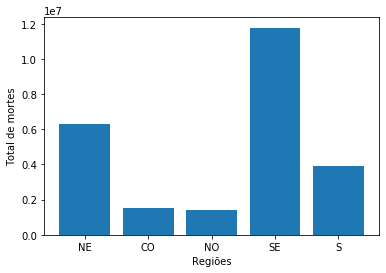

In [5]:
#total de mortes ocorridas em cada região
total_obitos = [ne['numero_obitos'].sum(), co['numero_obitos'].sum(), no['numero_obitos'].sum(), 
              se['numero_obitos'].sum(), sul['numero_obitos'].sum()]
bars = ('NE', 'CO', 'NO', 'SE', 'S')

y_pos = np.arange(len(bars))
 
plt.bar(y_pos, total_obitos)
 
plt.xticks(y_pos, bars)

plt.xlabel('Regiões')
plt.ylabel("Total de mortes")
 
plt.show()

A seguir analiso a total de mortes acumulado por cada cidade no período de 1996 a 2018 na região SE.

In [6]:
se_cidade = se.groupby(['id_municipio']).agg({'numero_obitos': 'sum'})

In [7]:
se_cidade.describe()

,numero_obitos
count,1.713000e+03
mean,6.874913e+03
std,4.882328e+04
min,1.000000e+00
25%,6.810000e+02
50%,1.468000e+03
75%,3.824000e+03
max,1.618962e+06


É possível notar que uma única cidade acumulou uma quantidade muito maior de óbitos do que as demais na região. Está cidade acumulou 1 618 962 óbitos, enquanto o acumulo médio de óbitos na região SE é de 6 874. O gráfico abaixo mostra que outras duas cidades também acumularam uma quantidade de óbitos muito maior do que as demais.

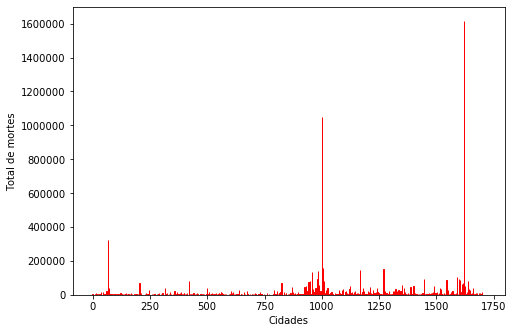

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_pos = np.arange(len(se_cidade.index))
ax.bar(x_pos, se_cidade['numero_obitos'],color='r', edgecolor='red')

plt.xlabel('Cidades')
plt.ylabel("Total de mortes")

plt.show()

In [9]:
se_cidade[se_cidade['numero_obitos']==1.618962e+06]

,numero_obitos
id_municipio,
3550308,1618962


Embora existam diferenças na quantidade média e máxima de óbitos em cada região do país, foi possível observar este padrão no qual um número pequeno de cidades centraliza maior parte dos óbitos de sua região. 

Para finalizar a análise da quantidade óbitos, o gráfico abaixo mostra como a quantidade de óbitos na região SE variou com o passar dos anos.

In [10]:
se_tempo = se.groupby(['ano']).agg({'numero_obitos': 'sum'})

In [11]:
se_tempo.describe()

,numero_obitos
count,23.000000
mean,512031.565217
std,47047.223669
min,460057.000000
25%,468993.500000
50%,493317.000000
75%,546467.500000
max,596378.000000


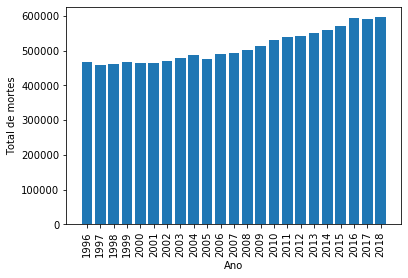

In [12]:
bars = (se_tempo.index)

y_pos = np.arange(len(se_tempo))
 
plt.bar(y_pos, se_tempo['numero_obitos'])
 
plt.xticks(y_pos, bars,rotation='vertical')

plt.xlabel('Ano')
plt.ylabel("Total de mortes")
 
plt.show()

Nota-se no gráfico que existe uma tendência de crescimento na quantidade de óbitos na região SE. A soma de óbitos nessa região alcançou o valor de 467 766 em 1996, enquanto em 2018 esse valor subiu para 596 378.

In [13]:
se_tempo.loc[1996]

numero_obitos    467766
Name: 1996, dtype: int64

In [14]:
se_tempo.loc[2018]

numero_obitos    596378
Name: 2018, dtype: int64

## Análise da causa básica dos óbitos

Acessando a tabela "municipio_causa.csv" é possível identificar a causa básica dos óbitos registrados. Inicialmente procurei identificar qual a causa mais frequente de óbitos no país e verificar se esta mesma causa é predominante nas regiões.

In [15]:
m_causa.head()

,Unnamed: 0,estado_abrev,id_municipio,causa_basica,ano,numero_obitos
0,0,AM,1300000,A162,1996,1
1,1,AM,1300000,A419,1996,2
2,2,AM,1300000,B24,1996,1
3,3,AM,1300000,C169,1996,1
4,4,AM,1300000,C240,1996,1


In [16]:
t = pandas.crosstab(m_causa['causa_basica'], ['numero_obitos'])

In [17]:
t.max()

col_0
numero_obitos    107532
dtype: int64

In [18]:
t[t['numero_obitos']==107532]

col_0,numero_obitos
causa_basica,
I219,107532


A maior causa de óbitos no Brasil no período de 1996 a 2018 é a **I219**. Em seguida verifico se esta também é a causa predominante quando observo apenas uma região do país.

In [19]:
ne = m_causa[m_causa['estado_abrev'].isin(['AL','BA', 'CE', 'MA','PB','PE','PI','RN','SE'])]
co = m_causa[m_causa['estado_abrev'].isin(['GO','MT', 'MS', 'DF'])]
no = m_causa[m_causa['estado_abrev'].isin(['AC','AP', 'AM', 'PA','RO','RR','TO'])]
se = m_causa[m_causa['estado_abrev'].isin(['ES','MG', 'RJ', 'SP'])]
sul = m_causa[m_causa['estado_abrev'].isin(['PR','RS', 'SC'])]

In [20]:
se_causa = pandas.crosstab(se['causa_basica'], ['numero_obitos'])
se_causa.max()

col_0
numero_obitos    32830
dtype: int64

In [21]:
se_causa[se_causa['numero_obitos']==32830]

col_0,numero_obitos
causa_basica,
I219,32830


 A região SE também teve a **I219** como principal causa de óbitos. Seguindo a mesma lógica, identifico a principal causa em cada região. A tabela abaixo apresenta os resultados obtidos, onde apenas NE não teve I219 como a causa básica que causou mais óbitos.

| Região | Causa mais frequente de óbitos|
| :---: | :---: |
| SE | I219 |
| NE | I64 |
| CO | I219 |
| NO | I219 |
| S | I219 |

Em seguida analiso a causa de óbito por ano. Assim é possível identificar se a **I219** sempre causou muitos óbitos no país, ou se isso mudou com o passar do tempo.

In [22]:
y = pandas.crosstab(m_causa['causa_basica'], [m_causa['ano']])
y

ano,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
causa_basica,,,,,,,,,,,,,,,,,,,,,
A000,1,1,2,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A001,3,7,5,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A009,11,16,22,36,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A010,21,15,5,14,10,8,10,9,8,4,...,8,5,4,5,3,2,2,0,0,1
A011,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y882,2,0,0,0,4,1,5,0,3,2,...,1,1,2,2,2,1,3,2,3,1
Y883,5,9,6,11,24,18,24,13,25,27,...,25,34,25,31,31,33,42,48,42,46
Y890,0,0,0,2,0,0,1,0,0,1,...,0,1,3,1,0,1,0,1,1,1


In [23]:
y.idxmax(axis=0)

ano
1996     R98
1997     R98
1998     R98
1999     R98
2000     I64
2001     I64
2002    I219
2003     I64
2004    I219
2005    I219
2006    I219
2007    I219
2008    I219
2009    I219
2010    I219
2011    I219
2012    I219
2013    I219
2014    I219
2015    I219
2016    I219
2017    I219
2018    I219
dtype: object

A lista acima mostra quais foram as causas básicas com maior quantidade de óbitos ao longo dos anos. Inicialmente, **R98** causou a maior quantidade de óbitos entre 1996 e 1999. Os anos de 2000 e 2001 tem como principal causa básica a **I64**. Em 2002, surge o primeiro pico de **I219** que é ultrapassado por **I64** em 2003. De 2004 até 2018, **I219** domina como principal causa básica de óbitos no Brasil.

## Explorando dados disponíveis na tabela microdados

A tabela microdados contém detalhes referente a cada óbito registrado. Com esses dados é possível criar um perfil de pessoas que sofrem maior mortalidade no Brasil, em uma região específica, ou até mesmo em um município. A seguir eu faço a conexão com o BigQuery, um serviço Google onde está hospedado os dados da tabela microdados.

In [24]:
from google.cloud import bigquery
#%load_ext google.cloud.bigquery
%reload_ext google.cloud.bigquery

pandas_gbq.context.project = 'basedosdados'
pandas_gbq.context.dialect = 'standard'

In [25]:
%%bigquery
SELECT * FROM `basedosdados.br_ms_sim.microdados` LIMIT 100

,ano,estado_abrev,sequencial_obito,tipo_obito,causa_basica,data_obito,data_nasc,idade,genero,raca_cor,...,versao_sistema,versao_SCB,atestado,numero_dias_obito_ficha,fontes,tipo_resgate_informacao,tipo_nivel_investigador,numero_dias_inf,fontes_inf,alt_causa
0,1996,AM,1,nao-fetal,X959,1996-01-21,None,25.000000000,feminino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
1,1996,AM,2,nao-fetal,X599,1996-01-20,1939-08-09,56.000000000,masculino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
2,1996,AM,3,nao-fetal,A162,1996-01-06,1935-03-20,60.000000000,feminino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
3,1996,AM,4,nao-fetal,I10,1996-02-22,1925-01-15,71.000000000,feminino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
4,1996,AM,5,nao-fetal,I64,1996-02-29,1935-10-05,60.000000000,feminino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1996,AM,96,nao-fetal,A09,1996-01-29,1994-04-28,1.000000000,masculino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
96,1996,AM,97,nao-fetal,C169,1996-01-03,1956-10-24,39.000000000,masculino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
97,1996,AM,98,nao-fetal,I64,1996-01-19,1921-12-01,74.000000000,feminino,None,...,None,None,None,NaN,None,None,None,NaN,None,None
98,1996,AM,99,nao-fetal,J157,1996-01-18,1968-04-12,27.000000000,masculino,None,...,None,None,None,NaN,None,None,None,NaN,None,None


Após acessar os dados da tabela, irei mostrar qual o gênero que possui mais mortes registradas. A primeira tabela apresenta o total de óbitos do gênero masculino, enquanto a segunda apresenta o total do gênero feminino.

In [26]:
%%bigquery
SELECT count(genero) FROM `basedosdados.br_ms_sim.microdados` where genero='masculino'

,f0_
0,14320368


In [27]:
%%bigquery
SELECT count(genero) FROM `basedosdados.br_ms_sim.microdados` where genero='feminino'

,f0_
0,10657969


Assim, é possível concluir que existem mais registros de óbitos de homens (14 320 368), do que de mulheres (10 657 969). Seguindo a mesma lógica, é possível identificar a média de idade com que as pessoas vieram a óbito, a raça da maioria dos óbitos, ou a principal causa dos óbitos. Esta análise pode ser feita em um escopo nacional, regional, estadual e municipal. Por exemplo, o resultado abaixo apresenta o registro de óbitos no período de 1998 a 2018, divididos por raça/cor, no estado da Bahia. Este exemplo não inclui a contagem dos registros de óbito onde a raça/cor não foi declarada.

In [28]:
%%bigquery
SELECT * FROM (SELECT raca_cor, count(raca_cor) as obitos FROM `basedosdados.br_ms_sim.microdados` WHERE estado_abrev='BA' GROUP BY raca_cor) WHERE raca_cor!='None';

,raca_cor,obitos
0,preta,174801
1,amarela,6294
2,branca,257317
3,parda,764012
4,indigena,2449
